In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1.讀入tensorflow

In [2]:
import tensorflow as tf

## 2.讀入數據集

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train.shape

(60000, 28, 28)

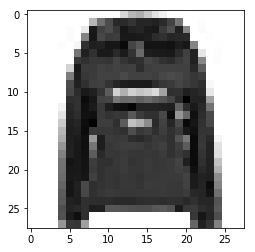

In [9]:
#顯示圖片
plt.imshow(x_train[8787],cmap='Greys')

## 3.資料整理

In [10]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255
x_train[99]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train,10)

In [13]:
y_test = to_categorical(y_test,10)

In [14]:
y_train[188]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#打造神經網絡

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

In [17]:
#開一台學習機
model = Sequential()

In [18]:
#神經網絡
model.add(Dense(99,input_dim=784,activation='relu'))
model.add(Dense(99,activation='relu'))

W0328 13:33:01.756811  3304 deprecation.py:506] From E:\anaconda\anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
#輸出層
model.add(Dense(10,activation='softmax'))

In [20]:
#組裝神經網絡
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 99)                77715     
_________________________________________________________________
dense_1 (Dense)              (None, 99)                9900      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1000      
Total params: 88,615
Trainable params: 88,615
Non-trainable params: 0
_________________________________________________________________


In [22]:
784*99+99

77715

## 5.訓練資料

In [27]:
model.fit(x_train,y_train,batch_size=50,epochs=25)

Epoch 1/25
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0187 - acc: 0.8751
Epoch 2/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0185 - acc: 0.8758
Epoch 3/25
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0184 - acc: 0.8770
Epoch 4/25
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0182 - acc: 0.8786
Epoch 5/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0180 - acc: 0.8799
Epoch 6/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0179 - acc: 0.8806
Epoch 7/25
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0178 - acc: 0.8814
Epoch 8/25
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0176 - acc: 0.8824
Epoch 9/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0175 - acc: 0.8826
Epoch 10/25
60000/60000 [==============================] - 4s 63us/sample - loss: 

## 6.訓練成果

In [24]:
result = model.predict_classes(x_test)

In [26]:
print(result[1])
print(y_test[1])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
